In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## EDA:

In [436]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [437]:
## copying test dataset to a new dataset for output
df2 = df1.copy()

In [438]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [439]:
df1

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [440]:
#Statistical summary of train dataset
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [441]:
df.shape

(159571, 8)

#### We have 159571 data rows and 8 columns in the training dataframe.

In [442]:
df1.shape

(153164, 2)

#### We have 153164 data rows and 2 columns in the testing dataframe.

In [443]:
#Column Data type in training dataframe 
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

#### Point to note here is that all columns are not numeric

In [444]:
#Column Data type in testing dataframe
df1.dtypes

id              object
comment_text    object
dtype: object

### Target variables are malignant, highly_malignant, rude, threat, abuse and loathe and mutually exclusive (i.e. we do not consider any possible correlation between them)

### Checking Null values in Training Dataframe:

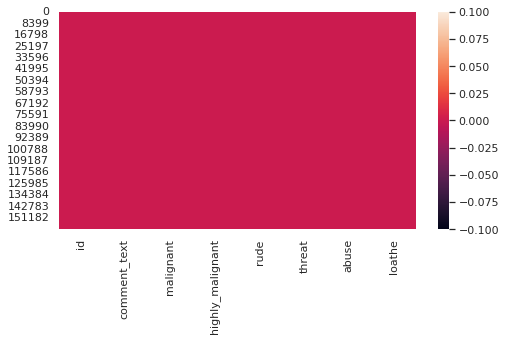

In [445]:
#Checking null values using heatmap
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull())
plt.show()

In [446]:
#Total number of null values in complete train dataset
df.isnull().sum().sum()

0

In [447]:
#number of null values in each column
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

#### As we can see there are no NULL values in train dataset

### Checking Null values in Testing Dataframe:

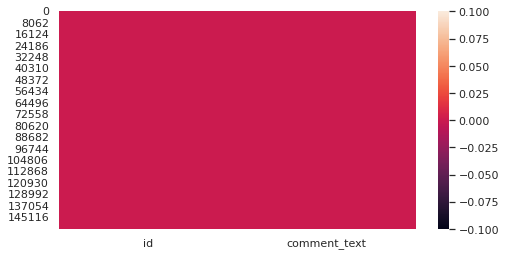

In [448]:
#Checking null values using heatmap
sns.heatmap(df1.isnull())
plt.show()

In [449]:
#Total number of null values in complete test dataset
df1.isnull().sum().sum()

0

In [450]:
#number of null values in each column
df1.isnull().sum()

id              0
comment_text    0
dtype: int64

#### As we can see there are no NULL values in test dataset

### Histogram Plots for training dataframe:

In [451]:
#Making dataframe of nominal data
df_visualisation_nominal = df[['malignant','highly_malignant','rude','threat','abuse','loathe']].copy()

0    144277
1     15294
Name: malignant, dtype: int64


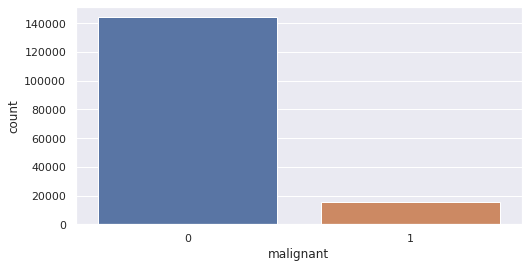

In [452]:
#Visualisation of malignant data
ax = sns.countplot(x='malignant',data=df_visualisation_nominal)
print(df_visualisation_nominal['malignant'].value_counts())

**As we can see most comments do not lie in this category while some comments do lie in this category**

0    157976
1      1595
Name: highly_malignant, dtype: int64


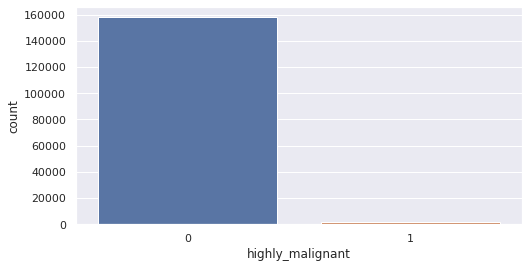

In [453]:
#Visualisation of highly_malignant data
ax = sns.countplot(x='highly_malignant',data=df_visualisation_nominal)
print(df_visualisation_nominal['highly_malignant'].value_counts())

**As we can see most comments do not lie in this category while some comments do lie in this category**

0    151122
1      8449
Name: rude, dtype: int64


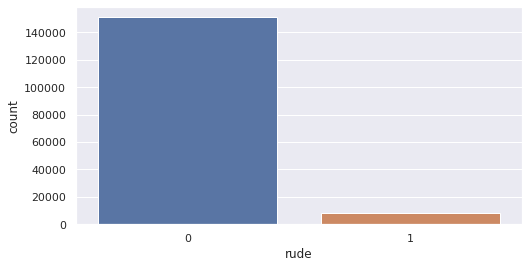

In [454]:
#Visualisation of rude data
ax = sns.countplot(x='rude',data=df_visualisation_nominal)
print(df_visualisation_nominal['rude'].value_counts())

**As we can see most comments do not lie in this category while some comments do lie in this category**

0    159093
1       478
Name: threat, dtype: int64


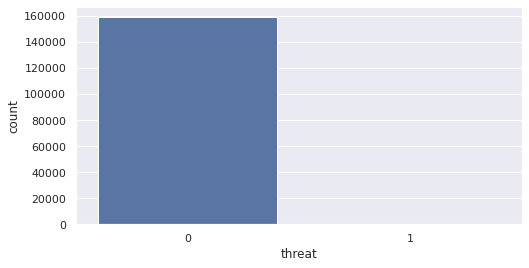

In [455]:
#Visualisation of threat data
ax = sns.countplot(x='threat',data=df_visualisation_nominal)
print(df_visualisation_nominal['threat'].value_counts())

**As we can see most comments do not lie in this category while some comments do lie in this category**

0    151694
1      7877
Name: abuse, dtype: int64


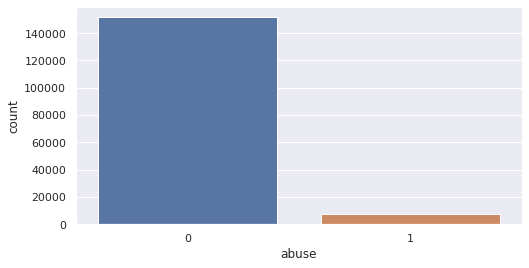

In [456]:
#Visualisation of abuse data
ax = sns.countplot(x='abuse',data=df_visualisation_nominal)
print(df_visualisation_nominal['abuse'].value_counts())

**As we can see most comments do not lie in this category while some comments do lie in this category**

0    158166
1      1405
Name: loathe, dtype: int64


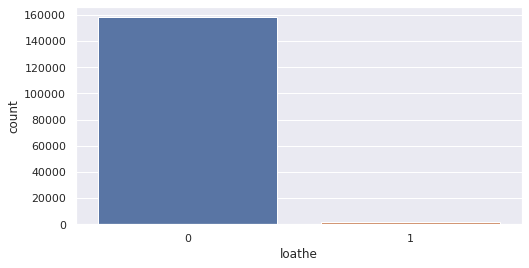

In [457]:
#Visualisation of loathe data
ax = sns.countplot(x='loathe',data=df_visualisation_nominal)
print(df_visualisation_nominal['loathe'].value_counts())

**As we can see most comments do not lie in this category while some comments do lie in this category**

### Important graphs on comment_text :

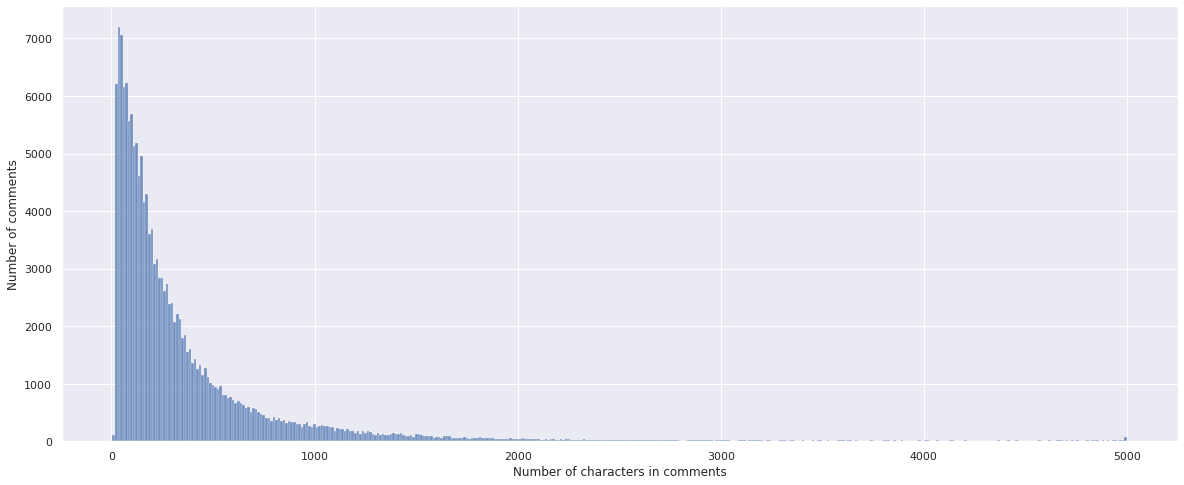

In [458]:
# Number of comments vs Size of comments
sns.set(rc={'figure.figsize':(20,8)})
sns.histplot(df['comment_text'].str.len())
plt.xlabel("Number of characters in comments")
plt.ylabel("Number of comments")
plt.show()

**Number of comments decreases exponentialy with increase in Number of characters in comments**

In [459]:
#Average size of comments is:
df['comment_text'].str.len().mean()

394.138847284281

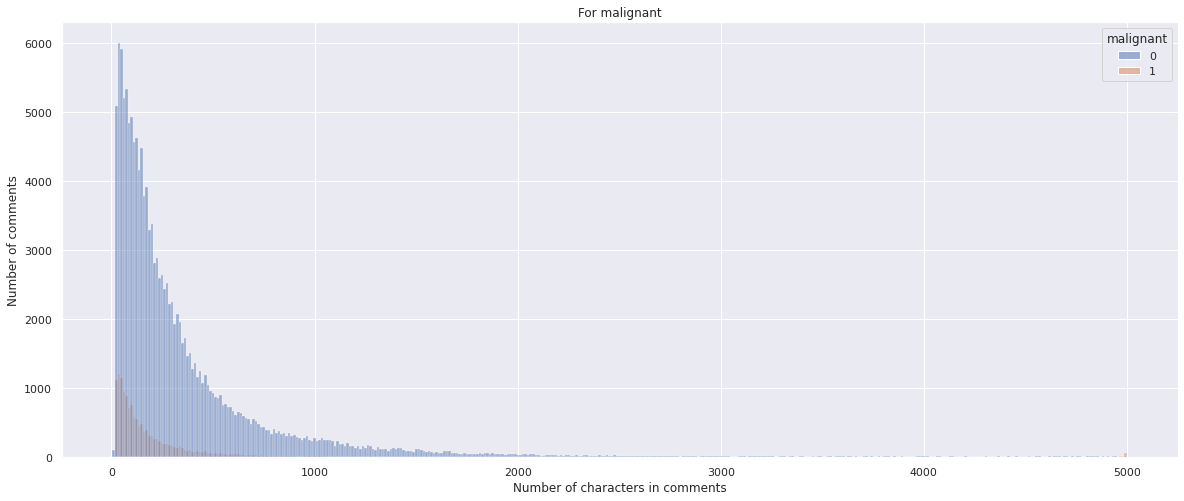

In [460]:
# Number of comments vs Size of comments for malignant
sns.histplot(df, x=df['comment_text'].str.len(), hue="malignant")
plt.title("For malignant")
plt.xlabel("Number of characters in comments")
plt.ylabel("Number of comments")
plt.show()

**Number of comments decreases exponentialy with increase in Number of characters in comments**

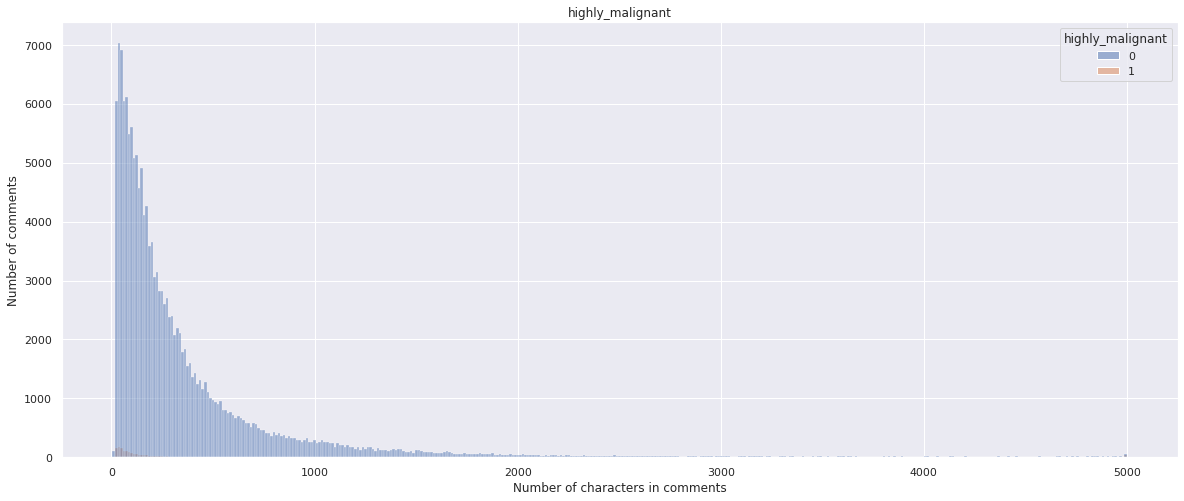

In [461]:
# Number of comments vs Size of comments for highly_malignant
sns.histplot(df, x=df['comment_text'].str.len(), hue="highly_malignant")
plt.title("highly_malignant")
plt.xlabel("Number of characters in comments")
plt.ylabel("Number of comments")
plt.show()

**Number of comments decreases exponentialy with increase in Number of characters in comments**

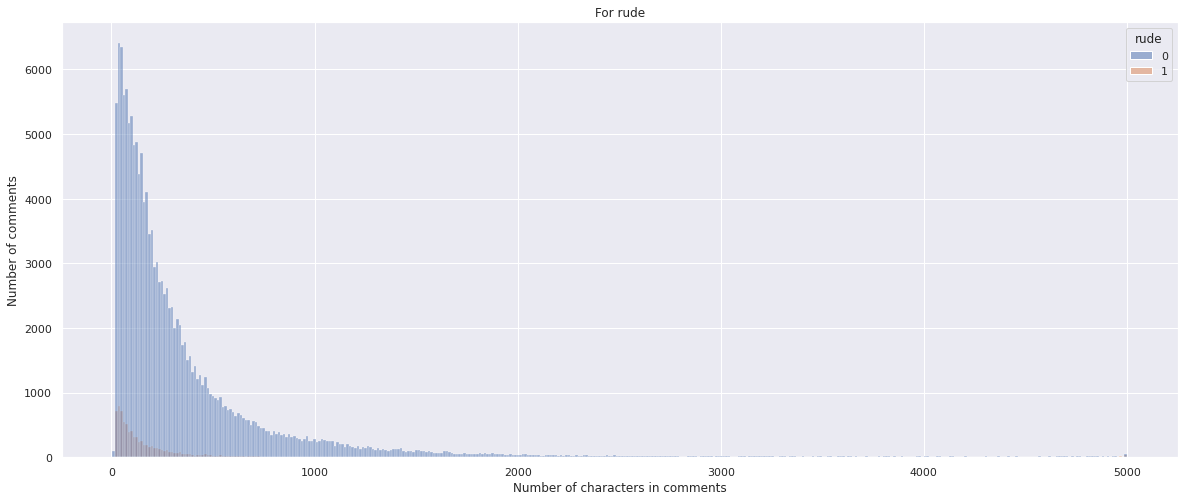

In [462]:
# Number of comments vs Size of comments for rude
sns.histplot(df, x=df['comment_text'].str.len(), hue="rude")
plt.title("For rude")
plt.xlabel("Number of characters in comments")
plt.ylabel("Number of comments")
plt.show()

**Number of comments decreases exponentialy with increase in Number of characters in comments**

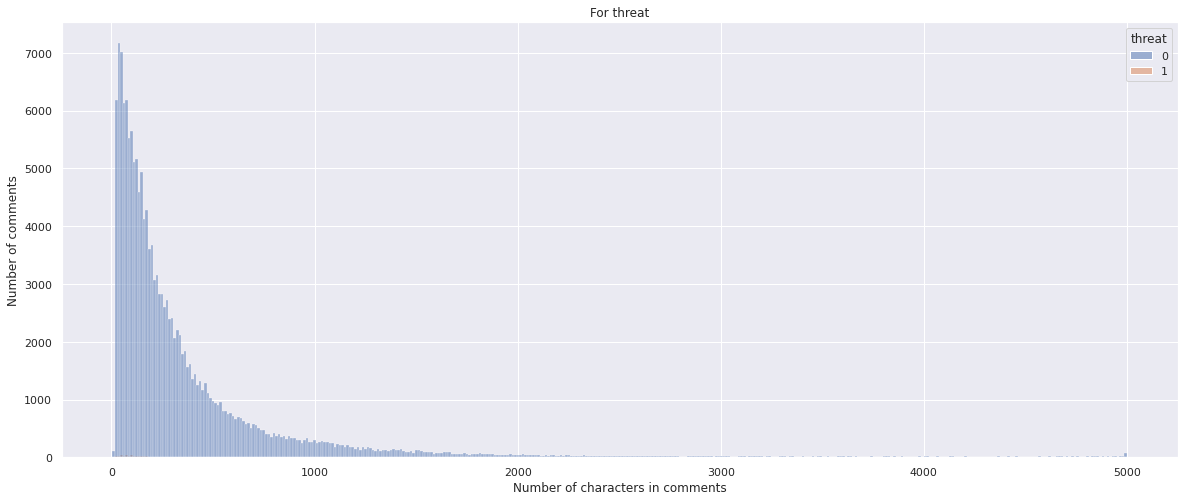

In [463]:
# Number of comments vs Size of comments for threat
sns.histplot(df, x=df['comment_text'].str.len(), hue="threat")
plt.title("For threat")
plt.xlabel("Number of characters in comments")
plt.ylabel("Number of comments")
plt.show()

**Number of comments decreases exponentialy with increase in Number of characters in comments**

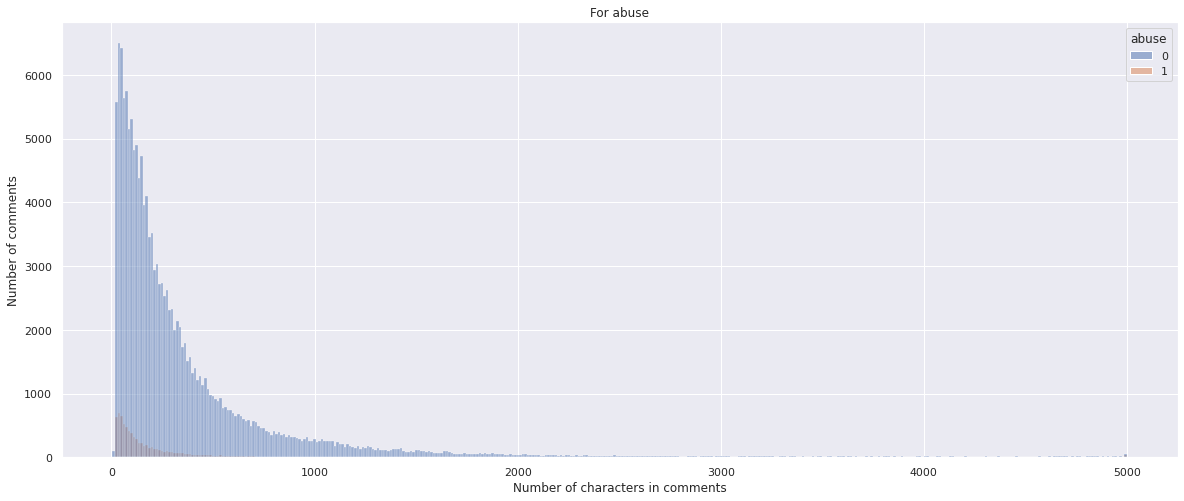

In [464]:
# Number of comments vs Size of comments for abuse
sns.histplot(df, x=df['comment_text'].str.len(), hue="abuse")
plt.title("For abuse")
plt.xlabel("Number of characters in comments")
plt.ylabel("Number of comments")
plt.show()

**Number of comments decreases exponentialy with increase in Number of characters in comments**

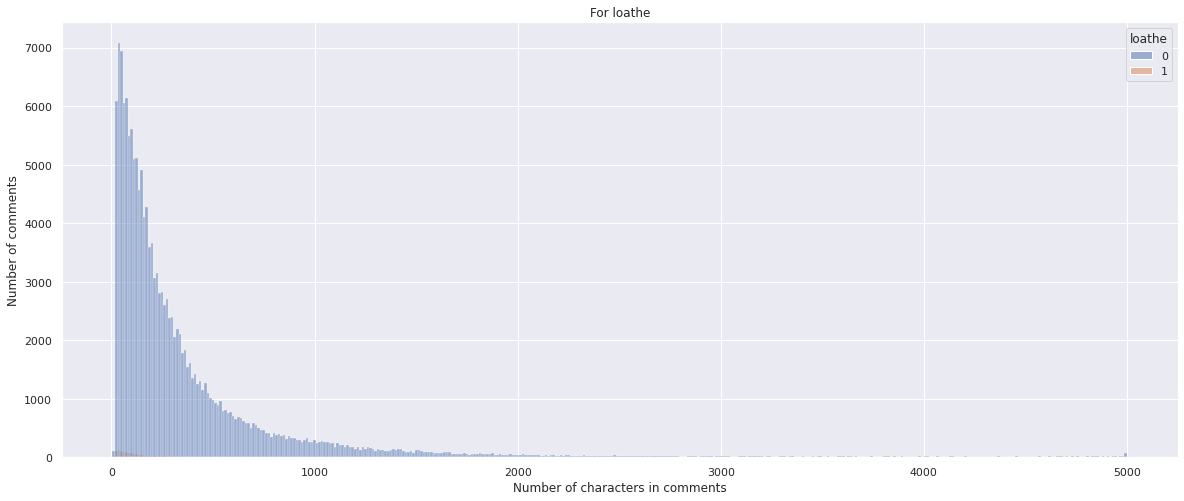

In [465]:
# Number of comments vs Size of comments for loathe
sns.histplot(df, x=df['comment_text'].str.len(), hue="loathe")
plt.title("For loathe")
plt.xlabel("Number of characters in comments")
plt.ylabel("Number of comments")
plt.show()

**Number of comments decreases exponentialy with increase in Number of characters in comments**

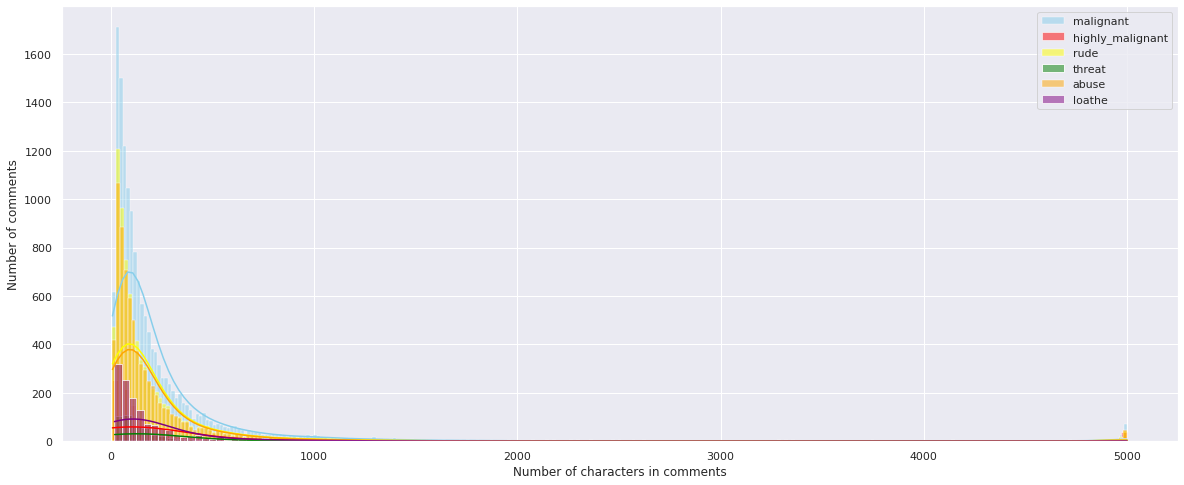

In [466]:
#comparing for all target variables
sns.histplot(data=df, x=df['comment_text'].str.len().where(df["malignant"]==1), color="skyblue", label="malignant", kde=True)
sns.histplot(data=df, x=df['comment_text'].str.len().where(df["highly_malignant"]==1), color="red", label="highly_malignant", kde=True)
sns.histplot(data=df, x=df['comment_text'].str.len().where(df["rude"]==1), color="yellow", label="rude", kde=True)
sns.histplot(data=df, x=df['comment_text'].str.len().where(df["threat"]==1), color="green", label="threat", kde=True)
sns.histplot(data=df, x=df['comment_text'].str.len().where(df["abuse"]==1), color="orange", label="abuse", kde=True)
sns.histplot(data=df, x=df['comment_text'].str.len().where(df["loathe"]==1), color="purple", label="loathe", kde=True)
plt.xlabel("Number of characters in comments")
plt.ylabel("Number of comments")
plt.legend()

**Here we can see that 'malignant' has highest curve**

#### Visualisation is completed

In [467]:
# creating new column with data consisting of number of characters in comment
df["comment size"] = df['comment_text'].str.len()
df1["comment size"] = df1['comment_text'].str.len()

In [468]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment size
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


### Encoding of Both training and testing Dataframe(Converting String to numeric):

In [469]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [470]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [471]:
for i in df1.columns:
    if df1[i].dtypes == "object":
        df1[i] = enc.fit_transform(df1[i].values.reshape(-1,1))

In [472]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment size
0,0.0,72698.0,0,0,0,0,0,0,264
1,1.0,68359.0,0,0,0,0,0,0,112
2,2.0,79594.0,0,0,0,0,0,0,233
3,4.0,35519.0,0,0,0,0,0,0,622
4,5.0,146426.0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,159505.0,44289.0,0,0,0,0,0,0,295
159567,159510.0,145720.0,0,0,0,0,0,0,99
159568,159524.0,122203.0,0,0,0,0,0,0,81
159569,159535.0,60037.0,0,0,0,0,0,0,116


In [473]:
df1

,id,comment_text,comment size
0,0.0,139489.0,367
1,1.0,82945.0,50
2,2.0,15380.0,54
3,3.0,71743.0,205
4,4.0,116535.0,41
...,...,...,...
153159,153159.0,51845.0,60
153160,153160.0,93347.0,198
153161,153161.0,13499.0,423
153162,153162.0,8042.0,502


### Correlations for all target variable dataframes:

<AxesSubplot:>

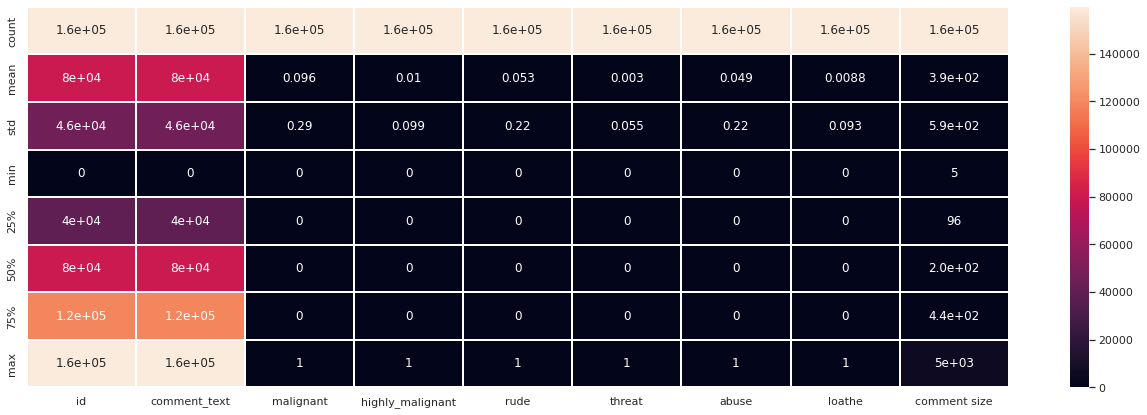

In [474]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [475]:
#Correlation matrix
df.corr()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment size
id,1.000000,0.002812,-0.003263,-0.001403,-0.002188,-0.001165,-0.002086,-0.000844,-0.000995
comment_text,0.002812,1.000000,0.132016,0.057627,0.104020,0.026093,0.111724,0.046234,-0.264701
malignant,-0.003263,0.132016,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.054413
highly_malignant,-0.001403,0.057627,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.010175
rude,-0.002188,0.104020,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.042910
threat,-0.001165,0.026093,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.007917
abuse,-0.002086,0.111724,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.045027
loathe,-0.000844,0.046234,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.013628
comment size,-0.000995,-0.264701,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,1.000000


<AxesSubplot:>

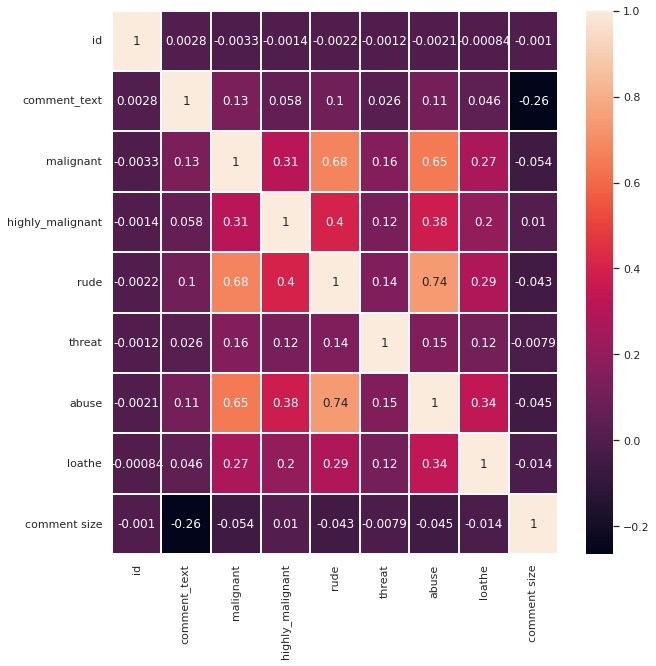

In [476]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

#### Here we can 't see very high correlations and also we already know that all target variables are mutually exclusive.

In [477]:
#Checking columns which appear to be highly correlated with target columns

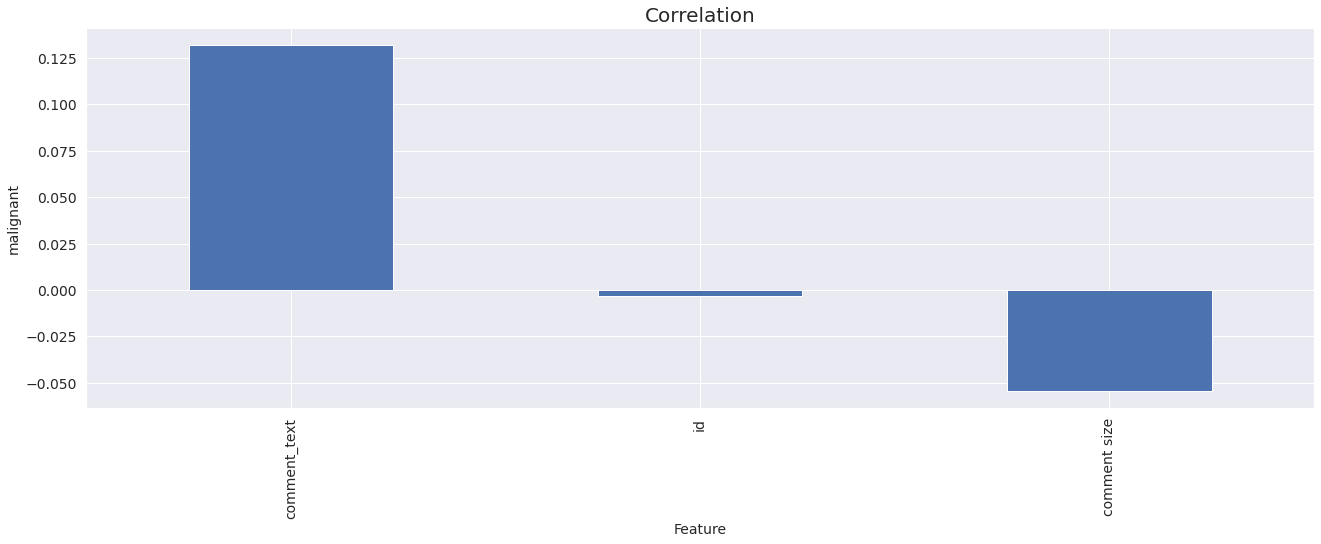

In [478]:
plt.figure(figsize=(22,7))
df.corr()['malignant'].sort_values(ascending = False).drop(['malignant','highly_malignant','rude','threat','abuse','loathe']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('malignant',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

#### Here we can't see very high correlation with target variable 'malignant' and similar result is obtained with other target variables

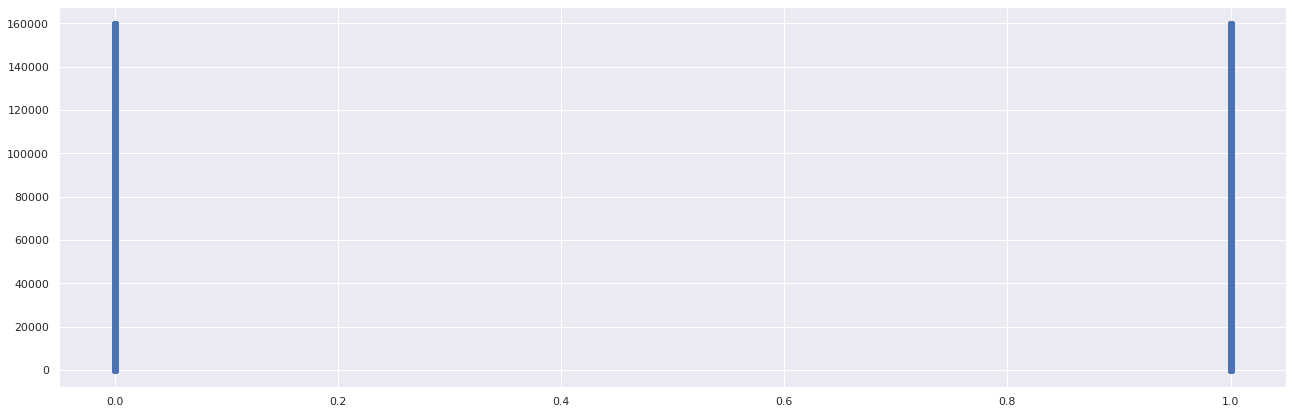

In [479]:
#Checking correlation between malignant and comment_text
plt.figure(figsize=(22,7))
plt.scatter(df.malignant,df.comment_text)
plt.show()

#### We can see a good collinearity here

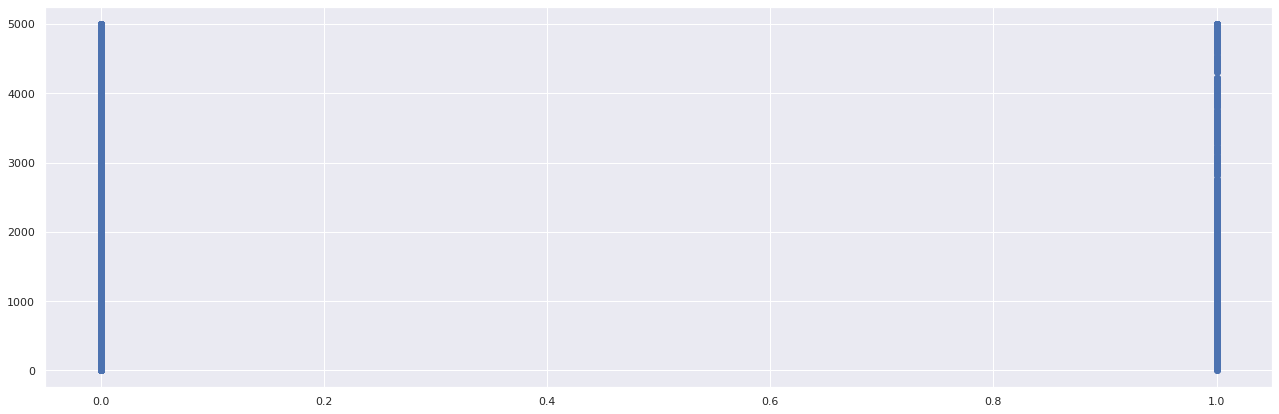

In [480]:
#Checking correlation between malignant and comment size
plt.figure(figsize=(22,7))
plt.scatter(df.malignant,df['comment size'])
plt.show()

#### We can see a good collinearity here

### Checkin VIF for confirmation of above conclusion:

In [481]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [482]:
X1 = df[['malignant', 'comment_text']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X1.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

In [483]:
print(vif_dF)

        feature       VIF
0     malignant  1.122938
1  comment_text  1.122938


### As we can't see high correlation(<10)

In [484]:
X2 = df[['malignant','comment size']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X2.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

In [485]:
print(vif_dF)

        feature       VIF
0     malignant  1.016866
1  comment size  1.016866


### As we can't see high correlation (<10)

### Removing Skewness :

In [486]:
#Checking skewness for training dataframe
df.skew()

id                  7.386055e-17
comment_text        1.282301e-19
malignant           2.745854e+00
highly_malignant    9.851722e+00
rude                3.992817e+00
threat              1.818900e+01
abuse               4.160540e+00
loathe              1.051592e+01
comment size        4.121676e+00
dtype: float64

In [487]:
#Checking skewness for testing dataframe
df1.skew()

id              0.000000e+00
comment_text    1.510704e-18
comment size    4.431581e+00
dtype: float64

#### Acceptable skewness (-0.65,+0.65)

#### All continous columns (excluding target variable) are in acceptable skew range

### Removing outliers :

In [488]:
#Outlier check
df.dtypes

id                  float64
comment_text        float64
malignant             int64
highly_malignant      int64
rude                  int64
threat                int64
abuse                 int64
loathe                int64
comment size          int64
dtype: object

id                    AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
comment_text        AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
malignant           AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
highly_malignant    AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
rude                AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
threat              AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
abuse               AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
loathe              AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
comment size          AxesSubplot(0.125,0.739237;0.0824468x0.0639831)
dtype: object

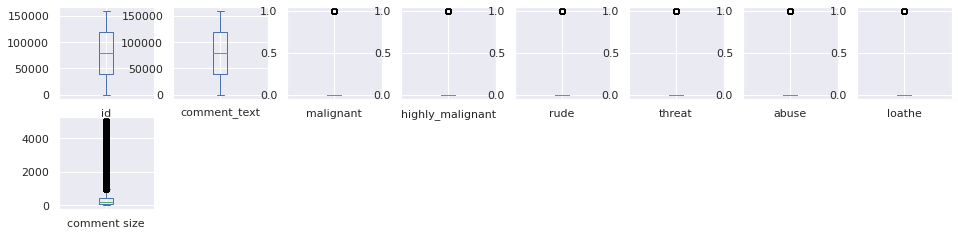

In [489]:
#Checking only for continous data types in training dataframe
df.plot.box(layout =(10,8),subplots=True,figsize=(16,20))

id                AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
comment_text    AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
comment size    AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
dtype: object

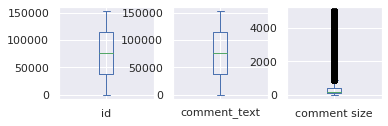

In [490]:
#Checking only for continous data types in testing dataframe
df1.plot.box(layout =(10,8),subplots=True,figsize=(16,20))

### No outliers in continous column so now we check with z-score:

In [491]:
#Outlier removal using z-score
df.shape

(159571, 9)

In [492]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([     6,      6,      6, ..., 159554, 159554, 159554]),
 array([2, 3, 4, ..., 2, 4, 6]))

#### We got no outlier in continous variable in training dataframe

In [493]:
from scipy.stats import zscore

z = np.abs(zscore(df1))
threshhold = 3
np.where(z>3)

(array([    38,     86,    145, ..., 153098, 153113, 153132]),
 array([2, 2, 2, ..., 2, 2, 2]))

#### We got no outlier in continous variable in testing dataframe

## Separating the columns into features and target:

In [494]:
feature = df.drop(['malignant','highly_malignant','rude','threat','abuse','loathe'],axis=1)
target1 = df["malignant"]
target2 = df["highly_malignant"]
target3 = df["rude"]
target4 = df["threat"]
target5 = df["abuse"]
target6 = df["loathe"]

In [495]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [496]:
import warnings
warnings.filterwarnings('ignore')

### Trying models for target variable "malignant" :

### Model 1 :

In [497]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [498]:
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target1,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(accuracy_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(accuracy_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.9044854922604499
At random state 0 the testing accuracy is : 0.902835657214476


At random state 1 the training accuracy is : 0.9045011593657956
At random state 1 the testing accuracy is : 0.9027729907566975


At random state 2 the training accuracy is : 0.9044071567337219
At random state 2 the testing accuracy is : 0.9031489895033683


At random state 3 the training accuracy is : 0.9037648054145516
At random state 3 the testing accuracy is : 0.9057183142722858


At random state 4 the training accuracy is : 0.9042269850222473
At random state 4 the testing accuracy is : 0.9038696537678208


At random state 5 the training accuracy is : 0.9037099705458419
At random state 5 the testing accuracy is : 0.9059376468745104


At random state 6 the training accuracy is : 0.9040859810741367
At random state 6 the testing accuracy is : 0.9044336518878271


At random state 7 the training accuracy is : 0.9042113179169017
At random state 7 the testing accu

In [499]:
features_train,features_test,target_train,target_test = train_test_split(feature,target1,test_size = 0.2,random_state = 4)

In [500]:
lr.fit(features_train,target_train)

LogisticRegression()

In [501]:
pred_test = lr.predict(features_test)

In [502]:
print(accuracy_score(target_test,pred_test))

0.9038696537678208


In [503]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Confusion matrix for model : \n",confusion_matrix(target_test,pred_test))
print("Classification Report for train data : \n",classification_report(target_train,pred_train))
print("Classification Report for test data : \n",classification_report(target_test,pred_test))

Confusion matrix for model : 
 [[28847     0]
 [ 3068     0]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    115430
           1       0.00      0.00      0.00     12226

    accuracy                           0.90    127656
   macro avg       0.45      0.50      0.47    127656
weighted avg       0.82      0.90      0.86    127656

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     28847
           1       0.00      0.00      0.00      3068

    accuracy                           0.90     31915
   macro avg       0.45      0.50      0.47     31915
weighted avg       0.82      0.90      0.86     31915



### Cross Validation of model:

In [504]:
Train_accuracy = accuracy_score(target_train,pred_train)
Test_accuracy = accuracy_score(target_test,pred_test)

In [505]:
from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,feature,target1,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is 0.9041555169761383 and accuracy score for training is 0.9042269850222473 and accuracy score for testing is 0.9038696537678208


At cross fold 3 the cv score is 0.9041555169723742 and accuracy score for training is 0.9042269850222473 and accuracy score for testing is 0.9038696537678208


At cross fold 4 the cv score is 0.9041555170471566 and accuracy score for training is 0.9042269850222473 and accuracy score for testing is 0.9038696537678208


At cross fold 5 the cv score is 0.9041555170041183 and accuracy score for training is 0.9042269850222473 and accuracy score for testing is 0.9038696537678208


At cross fold 6 the cv score is 0.9041555169610823 and accuracy score for training is 0.9042269850222473 and accuracy score for testing is 0.9038696537678208


At cross fold 7 the cv score is 0.9041555171929615 and accuracy score for training is 0.9042269850222473 and accuracy score for testing is 0.9038696537678208


At cross fold 8 the cv score is 0.904155

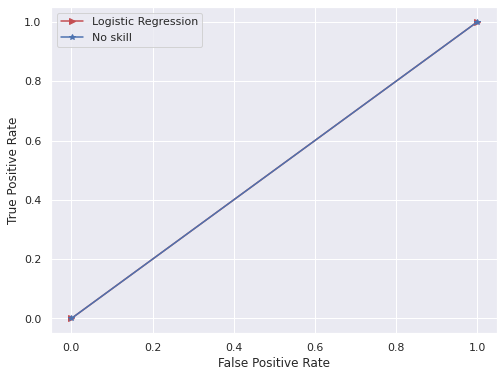

In [506]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(target_test, pred_test)
lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

plt.plot(lr_fpr, lr_tpr, marker='>', label='Logistic Regression', color='r')
plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

We can see area under roc-curve is nearly zero

### Trying other models:

In [507]:
def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
    print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
    print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
    print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))
    
    Train_accuracy = accuracy_score(target_train,model_1_pred_train)
    Test_accuracy = accuracy_score(target_test,model_1_pred_test)
    
    for j in range(2,4):
        cv_score = cross_val_score(algorithm_instance,feature,target1,cv=j)
        cv_mean = cv_score.mean()
        print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
        print("\n")
    
    #Plotting auc_roc curve
    plt.figure(figsize=(8,6))

    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(target_test, model_1_pred_test)
    lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

    plt.plot(lr_fpr, lr_tpr, marker='.', label=algorithm_instance, color='r')
    plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()
    plt.show()

### Model 2:

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.8541124862917123
Confusion matrix for model : 
 [[26401  2446]
 [ 2210   858]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115430
           1       1.00      1.00      1.00     12226

    accuracy                           1.00    127656
   macro avg       1.00      1.00      1.00    127656
weighted avg       1.00      1.00      1.00    127656

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     28847
           1       0.26      0.28      0.27      3068

    accuracy                           0.85     31915
   macro avg       0.59      0.60      0.59     31915
weighted avg       0.86      0.85      0.86     31915

At cross fold 2 the cv score is 0.852492000123015 and accuracy score for training is 1.0 and accuracy score for

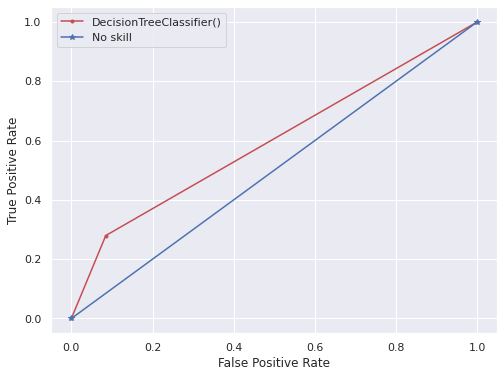

In [508]:
from sklearn.tree import DecisionTreeClassifier
model_selection(DecisionTreeClassifier(),features_train,target_train,features_test,target_test)

### Model 3:

Accuracy for the training model :  0.9998668296045623
Accuracy for the testing model :  0.9044963183456055
Confusion matrix for model : 
 [[28644   203]
 [ 2845   223]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115430
           1       1.00      1.00      1.00     12226

    accuracy                           1.00    127656
   macro avg       1.00      1.00      1.00    127656
weighted avg       1.00      1.00      1.00    127656

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     28847
           1       0.52      0.07      0.13      3068

    accuracy                           0.90     31915
   macro avg       0.72      0.53      0.54     31915
weighted avg       0.87      0.90      0.87     31915

At cross fold 2 the cv score is 0.9044876576458245 and accuracy score for training is 0.99986682

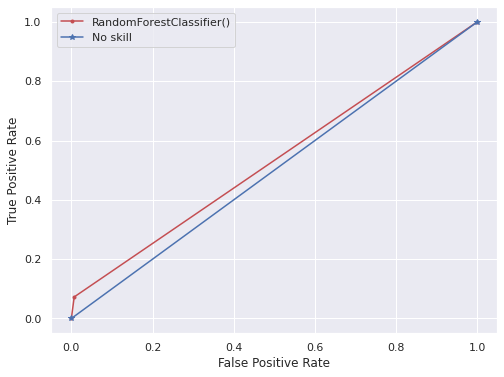

In [509]:
from sklearn.ensemble import RandomForestClassifier
model_selection(RandomForestClassifier(),features_train,target_train,features_test,target_test)

### Model 4:

Accuracy for the training model :  0.904320987654321
Accuracy for the testing model :  0.9040576531411562
Confusion matrix for model : 
 [[28845     2]
 [ 3060     8]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    115430
           1       0.68      0.00      0.00     12226

    accuracy                           0.90    127656
   macro avg       0.79      0.50      0.48    127656
weighted avg       0.88      0.90      0.86    127656

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     28847
           1       0.80      0.00      0.01      3068

    accuracy                           0.90     31915
   macro avg       0.85      0.50      0.48     31915
weighted avg       0.89      0.90      0.86     31915

At cross fold 2 the cv score is 0.9026013401258531 and accuracy score for training is 0.904320987

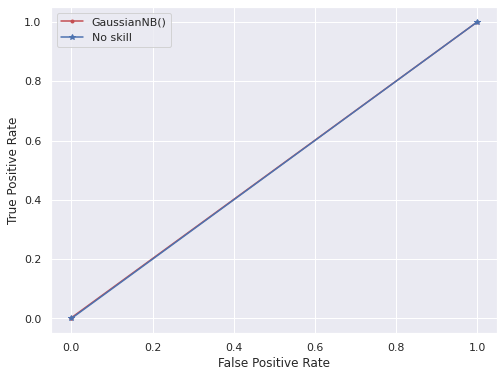

In [510]:
from sklearn.naive_bayes import GaussianNB
model_selection(GaussianNB(),features_train,target_train,features_test,target_test)

### Conclusion: Here DecisionTreeClassifier() gives best accuracy hence taking it as main model for all target

### Ensemble technique:

In [512]:
from sklearn.model_selection import GridSearchCV

#using 4 parameters
parameters = {'criterion':['entropy','gini'], 'max_features': ["auto","sqrt","log2"], 'min_samples_split' : [2,5,10], 'max_depth':[2,3,5]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5}


In [513]:
rf = DecisionTreeClassifier(criterion = "gini", max_features = "sqrt", max_depth = 5, min_samples_split = 5)
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = accuracy_score(target_test,pred_decision)
print('Accuracy score: ', abs(rfs)*100)

rfscore = cross_val_score(rf,feature,target1,cv=6)
rfc =rfscore.mean()
rfc
print('Cross Validation score: ', abs(rfc)*100)

Accuracy score:  90.40889863700454
Cross Validation score:  90.44813929879024


### Conclusion : We got r2_score as 90.41% for 'malignant' prediction

### Predicting 'malignant' for Test dataframe:

In [514]:
x = DecisionTreeClassifier()
features_test2 = df1
x.fit(features_train,target_train)
pred_test1 = x.predict(features_test2)

### Trying DecisionTreeClassifier() for target variable "highly_malignant" :

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.9827667241109196
Confusion matrix for model : 
 [[31322   297]
 [  253    43]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    126357
           1       1.00      1.00      1.00      1299

    accuracy                           1.00    127656
   macro avg       1.00      1.00      1.00    127656
weighted avg       1.00      1.00      1.00    127656

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     31619
           1       0.13      0.15      0.14       296

    accuracy                           0.98     31915
   macro avg       0.56      0.57      0.56     31915
weighted avg       0.98      0.98      0.98     31915

At cross fold 2 the cv score is 0.98312976770736 and accuracy score for training is 1.0 and accuracy score for 

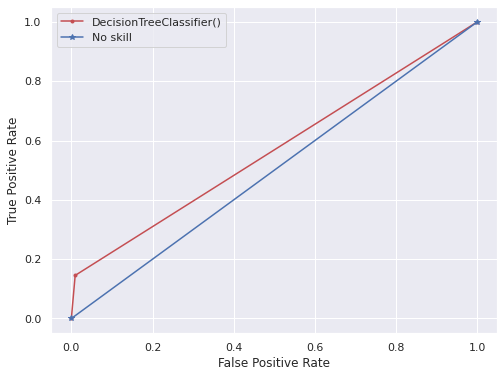

In [515]:
algorithm_instance = DecisionTreeClassifier()
features_train,features_test,target_train,target_test = train_test_split(feature,target2,test_size = 0.2,random_state = i)
algorithm_instance.fit(features_train,target_train)
model_1_pred_train = algorithm_instance.predict(features_train)
model_1_pred_test = algorithm_instance.predict(features_test)
print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))
   
Train_accuracy = accuracy_score(target_train,model_1_pred_train)
Test_accuracy = accuracy_score(target_test,model_1_pred_test)
  
for j in range(2,4):
    cv_score = cross_val_score(algorithm_instance,feature,target2,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")
    
#Plotting auc_roc curve
plt.figure(figsize=(8,6))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(target_test, model_1_pred_test)
lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

plt.plot(lr_fpr, lr_tpr, marker='.', label=algorithm_instance, color='r')
plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

### Predicting 'highly_malignant' for Test dataframe:

In [516]:
x = DecisionTreeClassifier()
features_test2 = df1
x.fit(features_train,target_train)
pred_test2 = x.predict(features_test2)

### Trying DecisionTreeClassifier() for target variable "rude" :

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.9130816230612565
Confusion matrix for model : 
 [[28760  1492]
 [ 1282   381]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    120870
           1       1.00      1.00      1.00      6786

    accuracy                           1.00    127656
   macro avg       1.00      1.00      1.00    127656
weighted avg       1.00      1.00      1.00    127656

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     30252
           1       0.20      0.23      0.22      1663

    accuracy                           0.91     31915
   macro avg       0.58      0.59      0.58     31915
weighted avg       0.92      0.91      0.92     31915

At cross fold 2 the cv score is 0.9092316120592818 and accuracy score for training is 1.0 and accuracy score fo

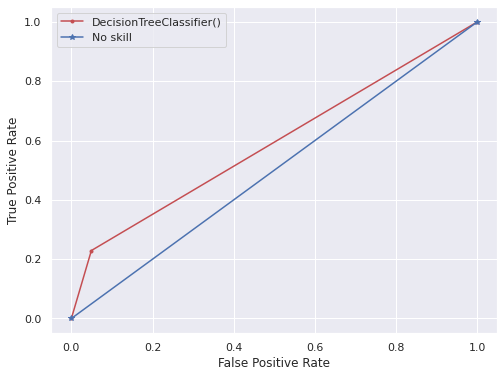

In [517]:
algorithm_instance = DecisionTreeClassifier()
features_train,features_test,target_train,target_test = train_test_split(feature,target3,test_size = 0.2,random_state = i)
algorithm_instance.fit(features_train,target_train)
model_1_pred_train = algorithm_instance.predict(features_train)
model_1_pred_test = algorithm_instance.predict(features_test)
print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))
   
Train_accuracy = accuracy_score(target_train,model_1_pred_train)
Test_accuracy = accuracy_score(target_test,model_1_pred_test)
  
for j in range(2,4):
    cv_score = cross_val_score(algorithm_instance,feature,target3,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")
    
#Plotting auc_roc curve
plt.figure(figsize=(8,6))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(target_test, model_1_pred_test)
lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

plt.plot(lr_fpr, lr_tpr, marker='.', label=algorithm_instance, color='r')
plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

### Predicting 'rude' for Test dataframe:

In [518]:
x = DecisionTreeClassifier()
features_test2 = df1
x.fit(features_train,target_train)
pred_test3 = x.predict(features_test2)

### Trying DecisionTreeClassifier() for target variable "threat" :

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.9948613504621652
Confusion matrix for model : 
 [[31745    92]
 [   72     6]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    127256
           1       1.00      1.00      1.00       400

    accuracy                           1.00    127656
   macro avg       1.00      1.00      1.00    127656
weighted avg       1.00      1.00      1.00    127656

Classification Report for test data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31837
           1       0.06      0.08      0.07        78

    accuracy                           0.99     31915
   macro avg       0.53      0.54      0.53     31915
weighted avg       1.00      0.99      1.00     31915

At cross fold 2 the cv score is 0.9945604156626277 and accuracy score for training is 1.0 and accuracy score fo

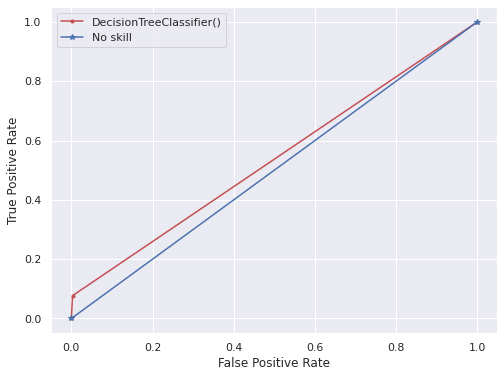

In [519]:
algorithm_instance = DecisionTreeClassifier()
features_train,features_test,target_train,target_test = train_test_split(feature,target4,test_size = 0.2,random_state = i)
algorithm_instance.fit(features_train,target_train)
model_1_pred_train = algorithm_instance.predict(features_train)
model_1_pred_test = algorithm_instance.predict(features_test)
print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))
   
Train_accuracy = accuracy_score(target_train,model_1_pred_train)
Test_accuracy = accuracy_score(target_test,model_1_pred_test)
  
for j in range(2,4):
    cv_score = cross_val_score(algorithm_instance,feature,target4,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")
    
#Plotting auc_roc curve
plt.figure(figsize=(8,6))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(target_test, model_1_pred_test)
lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

plt.plot(lr_fpr, lr_tpr, marker='.', label=algorithm_instance, color='r')
plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

### Predicting 'threat' for Test dataframe:

In [520]:
x = DecisionTreeClassifier()
features_test2 = df1
x.fit(features_train,target_train)
pred_test4 = x.predict(features_test2)

### Trying DecisionTreeClassifier() for target variable "abuse" :

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.9189409368635438
Confusion matrix for model : 
 [[28992  1374]
 [ 1213   336]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    121328
           1       1.00      1.00      1.00      6328

    accuracy                           1.00    127656
   macro avg       1.00      1.00      1.00    127656
weighted avg       1.00      1.00      1.00    127656

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     30366
           1       0.20      0.22      0.21      1549

    accuracy                           0.92     31915
   macro avg       0.58      0.59      0.58     31915
weighted avg       0.92      0.92      0.92     31915

At cross fold 2 the cv score is 0.9165324437989752 and accuracy score for training is 1.0 and accuracy score fo

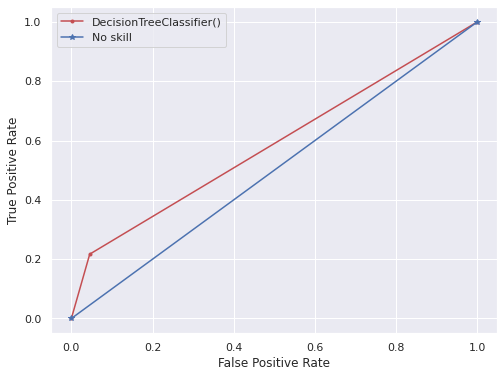

In [521]:
algorithm_instance = DecisionTreeClassifier()
features_train,features_test,target_train,target_test = train_test_split(feature,target5,test_size = 0.2,random_state = i)
algorithm_instance.fit(features_train,target_train)
model_1_pred_train = algorithm_instance.predict(features_train)
model_1_pred_test = algorithm_instance.predict(features_test)
print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))
   
Train_accuracy = accuracy_score(target_train,model_1_pred_train)
Test_accuracy = accuracy_score(target_test,model_1_pred_test)
  
for j in range(2,4):
    cv_score = cross_val_score(algorithm_instance,feature,target5,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")
    
#Plotting auc_roc curve
plt.figure(figsize=(8,6))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(target_test, model_1_pred_test)
lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

plt.plot(lr_fpr, lr_tpr, marker='.', label=algorithm_instance, color='r')
plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

### Predicting 'abuse' for Test dataframe:

In [522]:
x = DecisionTreeClassifier()
features_test2 = df1
x.fit(features_train,target_train)
pred_test5 = x.predict(features_test2)

### Trying DecisionTreeClassifier() for target variable "loathe" :

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.9827040576531412
Confusion matrix for model : 
 [[31352   303]
 [  249    11]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    126511
           1       1.00      1.00      1.00      1145

    accuracy                           1.00    127656
   macro avg       1.00      1.00      1.00    127656
weighted avg       1.00      1.00      1.00    127656

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     31655
           1       0.04      0.04      0.04       260

    accuracy                           0.98     31915
   macro avg       0.51      0.52      0.51     31915
weighted avg       0.98      0.98      0.98     31915

At cross fold 2 the cv score is 0.8214264433131013 and accuracy score for training is 1.0 and accuracy score fo

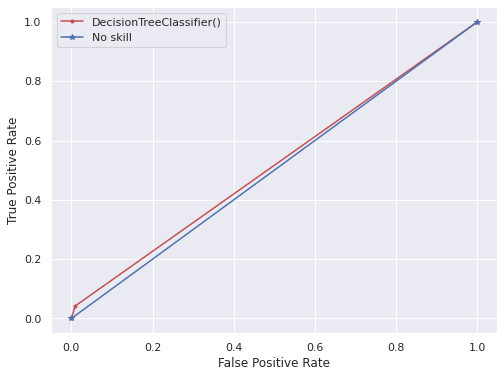

In [523]:
algorithm_instance = DecisionTreeClassifier()
features_train,features_test,target_train,target_test = train_test_split(feature,target6,test_size = 0.2,random_state = i)
algorithm_instance.fit(features_train,target_train)
model_1_pred_train = algorithm_instance.predict(features_train)
model_1_pred_test = algorithm_instance.predict(features_test)
print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))
   
Train_accuracy = accuracy_score(target_train,model_1_pred_train)
Test_accuracy = accuracy_score(target_test,model_1_pred_test)
  
for j in range(2,4):
    cv_score = cross_val_score(algorithm_instance,feature,target6,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")
    
#Plotting auc_roc curve
plt.figure(figsize=(8,6))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(target_test, model_1_pred_test)
lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

plt.plot(lr_fpr, lr_tpr, marker='.', label=algorithm_instance, color='r')
plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

### Predicting 'loathe' for Test dataframe:

In [524]:
x = DecisionTreeClassifier()
features_test2 = df1
x.fit(features_train,target_train)
pred_test6 = x.predict(features_test2)

###  Creating output dataframe

In [525]:
pred_out = pd.DataFrame({'malignant': pred_test1, 'highly_malignant': pred_test2, 'rude': pred_test3, 'threat': pred_test4, 'abuse': pred_test5, 'loathe': pred_test6})
pred_out

,malignant,highly_malignant,rude,threat,abuse,loathe
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0


In [526]:
output = df2.join(pred_out)

In [527]:
output

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,1,0,0,0,0,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0,0,0,0,0,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0,0,0,0,0,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0,0,0,0,0,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",0,0,0,0,0,0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",0,0,0,0,0,0
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",0,0,0,0,0,0


In [528]:
output.to_csv("output_prediction.csv",index = False)